In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


importing libraries 

In [2]:
%matplotlib inline
#libraries for mathematical computation 
import pandas as pd 
import numpy as np 
#libraries for data training and cleaning and modeling
from sklearn.ensemble import RandomForestRegressor 
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import BayesianRidge
#libraries for data visualization 
import matplotlib.pyplot as plt 
import seaborn as sns 
from matplotlib.pyplot import figure 


In [3]:
train_data= pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
train_data.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [4]:
test_data = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')
test_data.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
5,1466,60,RL,75.0,10000,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
6,1467,20,RL,NaN,7980,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,GdPrv,Shed,500,3,2010,WD,Normal
7,1468,60,RL,63.0,8402,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
8,1469,20,RL,85.0,10176,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2010,WD,Normal
9,1470,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,4,2010,WD,Normal


> ***Training Data***

The very first step of training of data is data cleaning , we find many of data sets with blank and empty values for those datasets we need to clean the data inorder to place a categorical values in those empty spaces depending upon the numerical data for that 

> **Cleaning of data inorder to sort and replace the missing values in data ****

In [5]:
print(train_data.shape)

(1460, 81)


In [6]:
print(train_data.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [7]:
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
print(train_data.describe)

<bound method NDFrame.describe of         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour 

In [9]:
train_data.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [10]:
#select numeric columns 
train_data_numeric=train_data.select_dtypes(include=[np.number])
numeric_cols=train_data_numeric.columns.values
print(numeric_cols)


['Id' 'MSSubClass' 'LotFrontage' 'LotArea' 'OverallQual' 'OverallCond'
 'YearBuilt' 'YearRemodAdd' 'MasVnrArea' 'BsmtFinSF1' 'BsmtFinSF2'
 'BsmtUnfSF' 'TotalBsmtSF' '1stFlrSF' '2ndFlrSF' 'LowQualFinSF'
 'GrLivArea' 'BsmtFullBath' 'BsmtHalfBath' 'FullBath' 'HalfBath'
 'BedroomAbvGr' 'KitchenAbvGr' 'TotRmsAbvGrd' 'Fireplaces' 'GarageYrBlt'
 'GarageCars' 'GarageArea' 'WoodDeckSF' 'OpenPorchSF' 'EnclosedPorch'
 '3SsnPorch' 'ScreenPorch' 'PoolArea' 'MiscVal' 'MoSold' 'YrSold'
 'SalePrice']


In [11]:
#select non numeric columns
train_data_non_numeric = train_data.select_dtypes(exclude=[np.number])
non_numeric_cols=train_data_non_numeric.columns.values
print(non_numeric_cols)

['MSZoning' 'Street' 'Alley' 'LotShape' 'LandContour' 'Utilities'
 'LotConfig' 'LandSlope' 'Neighborhood' 'Condition1' 'Condition2'
 'BldgType' 'HouseStyle' 'RoofStyle' 'RoofMatl' 'Exterior1st'
 'Exterior2nd' 'MasVnrType' 'ExterQual' 'ExterCond' 'Foundation'
 'BsmtQual' 'BsmtCond' 'BsmtExposure' 'BsmtFinType1' 'BsmtFinType2'
 'Heating' 'HeatingQC' 'CentralAir' 'Electrical' 'KitchenQual'
 'Functional' 'FireplaceQu' 'GarageType' 'GarageFinish' 'GarageQual'
 'GarageCond' 'PavedDrive' 'PoolQC' 'Fence' 'MiscFeature' 'SaleType'
 'SaleCondition']


> **Missing data in heat map ****

<AxesSubplot:>

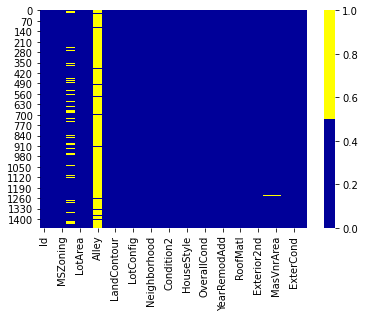

In [12]:
cols_hm = train_data.columns[:30]
colours=['#000099', '#ffff00']
sns.heatmap(train_data[cols_hm].isnull(),cmap=sns.color_palette(colours))

<AxesSubplot:>

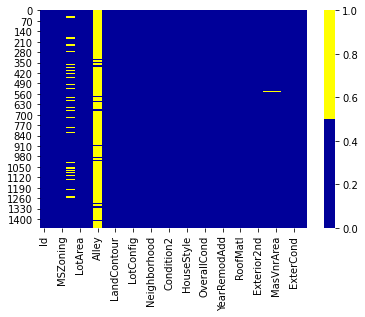

In [13]:
#missing data in heatmap for test_data
cols_hm = test_data.columns[:30]
colours=['#000099', '#ffff00']
sns.heatmap(test_data[cols_hm].isnull(),cmap=sns.color_palette(colours))

the above chart shows the missing values of first 30 features of train data set. where the horizontal access shows the feature name and vertical access shows the number of rows/columns. Here the yellow color shows missing data and blue colour otherwise.
The above heatmap shows that Alley has most missing values and uncleaned data and MsZoning have missing values but comparitively less Uncleaned data than Alley

Now lets find the missing value of data through percentage list method 

**Missing Data Percentage List**** 

In [14]:
for col in train_data.columns:
    pct_missing=np.mean(train_data[col].isnull())
    print('{} - {}%'.format(col,round(pct_missing*100)))

Id - 0%
MSSubClass - 0%
MSZoning - 0%
LotFrontage - 18%
LotArea - 0%
Street - 0%
Alley - 94%
LotShape - 0%
LandContour - 0%
Utilities - 0%
LotConfig - 0%
LandSlope - 0%
Neighborhood - 0%
Condition1 - 0%
Condition2 - 0%
BldgType - 0%
HouseStyle - 0%
OverallQual - 0%
OverallCond - 0%
YearBuilt - 0%
YearRemodAdd - 0%
RoofStyle - 0%
RoofMatl - 0%
Exterior1st - 0%
Exterior2nd - 0%
MasVnrType - 1%
MasVnrArea - 1%
ExterQual - 0%
ExterCond - 0%
Foundation - 0%
BsmtQual - 3%
BsmtCond - 3%
BsmtExposure - 3%
BsmtFinType1 - 3%
BsmtFinSF1 - 0%
BsmtFinType2 - 3%
BsmtFinSF2 - 0%
BsmtUnfSF - 0%
TotalBsmtSF - 0%
Heating - 0%
HeatingQC - 0%
CentralAir - 0%
Electrical - 0%
1stFlrSF - 0%
2ndFlrSF - 0%
LowQualFinSF - 0%
GrLivArea - 0%
BsmtFullBath - 0%
BsmtHalfBath - 0%
FullBath - 0%
HalfBath - 0%
BedroomAbvGr - 0%
KitchenAbvGr - 0%
KitchenQual - 0%
TotRmsAbvGrd - 0%
Functional - 0%
Fireplaces - 0%
FireplaceQu - 47%
GarageType - 6%
GarageYrBlt - 6%
GarageFinish - 6%
GarageCars - 0%
GarageArea - 0%
GarageQu

In [15]:
#for testdata
for col in test_data.columns:
    pct_missing=np.mean(train_data[col].isnull())
    print('{} - {}%'.format(col,round(pct_missing*100)))

Id - 0%
MSSubClass - 0%
MSZoning - 0%
LotFrontage - 18%
LotArea - 0%
Street - 0%
Alley - 94%
LotShape - 0%
LandContour - 0%
Utilities - 0%
LotConfig - 0%
LandSlope - 0%
Neighborhood - 0%
Condition1 - 0%
Condition2 - 0%
BldgType - 0%
HouseStyle - 0%
OverallQual - 0%
OverallCond - 0%
YearBuilt - 0%
YearRemodAdd - 0%
RoofStyle - 0%
RoofMatl - 0%
Exterior1st - 0%
Exterior2nd - 0%
MasVnrType - 1%
MasVnrArea - 1%
ExterQual - 0%
ExterCond - 0%
Foundation - 0%
BsmtQual - 3%
BsmtCond - 3%
BsmtExposure - 3%
BsmtFinType1 - 3%
BsmtFinSF1 - 0%
BsmtFinType2 - 3%
BsmtFinSF2 - 0%
BsmtUnfSF - 0%
TotalBsmtSF - 0%
Heating - 0%
HeatingQC - 0%
CentralAir - 0%
Electrical - 0%
1stFlrSF - 0%
2ndFlrSF - 0%
LowQualFinSF - 0%
GrLivArea - 0%
BsmtFullBath - 0%
BsmtHalfBath - 0%
FullBath - 0%
HalfBath - 0%
BedroomAbvGr - 0%
KitchenAbvGr - 0%
KitchenQual - 0%
TotRmsAbvGrd - 0%
Functional - 0%
Fireplaces - 0%
FireplaceQu - 47%
GarageType - 6%
GarageYrBlt - 6%
GarageFinish - 6%
GarageCars - 0%
GarageArea - 0%
GarageQu

**Missing Data Histogram ****

created missing indicator for:LotFrontage
created missing indicator for:Alley
created missing indicator for:MasVnrType
created missing indicator for:MasVnrArea
created missing indicator for:BsmtQual
created missing indicator for:BsmtCond
created missing indicator for:BsmtExposure
created missing indicator for:BsmtFinType1
created missing indicator for:BsmtFinType2
created missing indicator for:Electrical
created missing indicator for:FireplaceQu
created missing indicator for:GarageType
created missing indicator for:GarageYrBlt
created missing indicator for:GarageFinish
created missing indicator for:GarageQual
created missing indicator for:GarageCond
created missing indicator for:PoolQC
created missing indicator for:Fence
created missing indicator for:MiscFeature


<AxesSubplot:xlabel='index'>

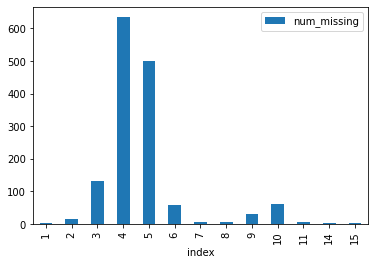

In [16]:
for col in train_data.columns:
    missing=train_data[col].isnull()
    num_missing= np.sum(missing)
    
    if num_missing >0:
        print('created missing indicator for:{}'.format(col))
        train_data['{}_ismissing'.format(col)]=missing
        
#then based on the indicator , plot the histogram of missing values 
ismissing_cols=[col for col in train_data.columns if 'ismissing' in col]
train_data['num_missing']= train_data[ismissing_cols].sum(axis=1)

train_data['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index',y='num_missing')

In [17]:
#droping rows with alot of missing values 
ind_missing=train_data[train_data['num_missing']>35].index
train_data_missing_rows=train_data.drop(ind_missing,axis=0)

In [18]:
#as we know the Alley has most of the missing values from whole dataset so we will drop the whole feature 
cols_to_drop=['Alley']
train_data_Alley=train_data.drop(cols_to_drop,axis=1)

In [19]:
#lets drop the column alley in test_data as well since we have droped it in train_data too
cols_to_drop=['Alley']
test_data_Alley=test_data.drop(cols_to_drop,axis=1)

In [20]:
#now we will apply imputation on all the numeric features at once for all
train_data_numeric =train_data.select_dtypes(include=[np.number])
numeric_cols=train_data_numeric.columns.values

for col in numeric_cols:
    missing=train_data[col].isnull()
    num_missing=np.sum(missing)
    
    if num_missing > 0:
        print('Imputing missing values for:{}'.format(col))
        train_data['{}_ismissing'.format(col)]=missing
        med= train_data[col].median()
        train_data[col]=train_data[col].fillna(med)

Imputing missing values for:LotFrontage
Imputing missing values for:MasVnrArea
Imputing missing values for:GarageYrBlt


**Irregular Data outliers****

<AxesSubplot:>

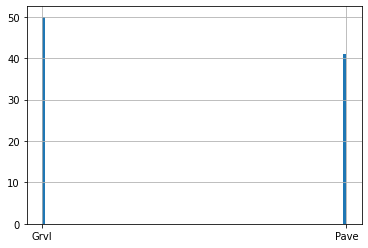

In [21]:
#histogram of Alley 
train_data['Alley'].hist(bins=100)


<AxesSubplot:>

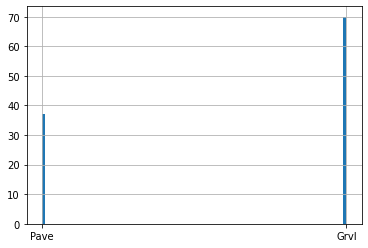

In [22]:
#histogram for alley for test_data
test_data['Alley'].hist(bins=100)

In [23]:
train_data['Alley'].describe()

count       91
unique       2
top       Grvl
freq        50
Name: Alley, dtype: object

some datasets have uninformative/repetative information which needs to be removed. lets find out how many features have repetitive data. now lets find out how many rows have duplicate features

In [24]:

#finding oyt duplicate rows
print(train_data.shape)

(1460, 101)


In [25]:
key=['MSSubClass','LotFrontage','LotArea','Street','LotShape','LandContour','Utilities']
train_data.fillna(-999).groupby(key)['Id'].count().sort_values(ascending=False).head(20)

MSSubClass  LotFrontage  LotArea  Street  LotShape  LandContour  Utilities
160         21.0         1680     Pave    Reg       Lvl          AllPub       10
20          80.0         9600     Pave    Reg       Lvl          AllPub        9
            60.0         7200     Pave    Reg       Lvl          AllPub        9
50          50.0         6000     Pave    Reg       Lvl          AllPub        6
20          70.0         9100     Pave    Reg       Lvl          AllPub        6
120         43.0         3182     Pave    Reg       Lvl          AllPub        5
50          52.0         6240     Pave    Reg       Lvl          AllPub        5
20          65.0         8450     Pave    Reg       Lvl          AllPub        5
60          65.0         8125     Pave    Reg       Lvl          AllPub        5
20          78.0         10140    Pave    Reg       Lvl          AllPub        4
70          60.0         9600     Pave    Reg       Lvl          AllPub        4
20          70.0         8400     

lets drop the duplicate based on its key feature 

In [26]:
#droping duplicates based on the subset of variables
key=['MSSubClass','LotFrontage','LotArea','Street','LotShape','LandContour','Utilities']
train_data_dedupped2=train_data.drop_duplicates(subset=key)
print(train_data.shape)
print(train_data_dedupped2.shape)

(1460, 101)
(1294, 101)


In [27]:
#dropping columns for test dataset 
#droping duplicates based on the subset of variables
key=['MSSubClass','LotFrontage','LotArea','Street','LotShape','LandContour','Utilities']
test_data_dedupped2=test_data.drop_duplicates(subset=key)
print(test_data.shape)
print(test_data_dedupped2.shape)

(1459, 80)
(1310, 80)


now we have droped all the duplicates 

In [28]:
train_data.drop(['Alley'],axis=1)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,FireplaceQu_ismissing,GarageType_ismissing,GarageYrBlt_ismissing,GarageFinish_ismissing,GarageQual_ismissing,GarageCond_ismissing,PoolQC_ismissing,Fence_ismissing,MiscFeature_ismissing,num_missing
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,True,False,False,False,False,False,True,True,True,5
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,False,False,False,False,False,False,True,True,True,4
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,False,False,False,False,False,False,True,True,True,4
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,False,False,False,False,False,False,True,True,True,4
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,False,False,False,False,False,False,True,True,True,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,False,False,False,False,False,False,True,True,True,4
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,False,False,False,False,False,False,True,False,True,3
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,False,False,False,False,False,False,True,False,False,2
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,True,False,False,False,False,False,True,True,True,5


In [29]:
#dropping column for test data 
test_data.drop(['Alley'],axis=1)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [30]:
#checking the fireplace column
train_data['FireplaceQu'].unique()

array([nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

In [31]:
#lets replace the null values of fireplace with none 
train_data['FireplaceQu']=train_data['FireplaceQu'].fillna('None')

In [32]:
#checking LotFrontage column 
train_data['LotFrontage'].unique()

array([ 65.,  80.,  68.,  60.,  84.,  85.,  75.,  69.,  51.,  50.,  70.,
        91.,  72.,  66., 101.,  57.,  44., 110.,  98.,  47., 108., 112.,
        74., 115.,  61.,  48.,  33.,  52., 100.,  24.,  89.,  63.,  76.,
        81.,  95.,  21.,  32.,  78., 121., 122.,  40., 105.,  73.,  77.,
        64.,  94.,  34.,  90.,  55.,  88.,  82.,  71., 120., 107.,  92.,
       134.,  62.,  86., 141.,  97.,  54.,  41.,  79., 174.,  99.,  67.,
        83.,  43., 103.,  93.,  30., 129., 140.,  35.,  37., 118.,  87.,
       116., 150., 111.,  49.,  96.,  59.,  36.,  56., 102.,  58.,  38.,
       109., 130.,  53., 137.,  45., 106., 104.,  42.,  39., 144., 114.,
       128., 149., 313., 168., 182., 138., 160., 152., 124., 153.,  46.])

In [33]:
#lets replace the null values of LotFrontage with its median 
train_data['LotFrontage']=train_data['LotFrontage'].fillna(train_data['LotFrontage'].median())

In [34]:
#checking GarageCond column
train_data['GarageCond'].unique()

array(['TA', 'Fa', nan, 'Gd', 'Po', 'Ex'], dtype=object)

In [35]:
#lets replace the GarageCond null values to none
train_data['GarageCond']=train_data['GarageCond'].fillna('None')

In [36]:
#checking GarageQual column 
train_data['GarageQual'].unique()

array(['TA', 'Fa', 'Gd', nan, 'Ex', 'Po'], dtype=object)

In [37]:
#lets replace the GarageQual null values to none
train_data['GarageQual']=train_data['GarageQual'].fillna('None')

In [38]:
#checking GarageFinish column 
train_data['GarageFinish'].unique()

array(['RFn', 'Unf', 'Fin', nan], dtype=object)

In [39]:
#lets replace the null values of GarageFinish with none 
train_data['GarageFinish']=train_data['GarageFinish'].fillna('None')

In [40]:
#checking GarageYrBlt column 
train_data['GarageYrBlt'].unique()

array([2003., 1976., 2001., 1998., 2000., 1993., 2004., 1973., 1931.,
       1939., 1965., 2005., 1962., 2006., 1960., 1991., 1970., 1967.,
       1958., 1930., 2002., 1968., 2007., 2008., 1957., 1920., 1966.,
       1959., 1995., 1954., 1953., 1980., 1983., 1977., 1997., 1985.,
       1963., 1981., 1964., 1999., 1935., 1990., 1945., 1987., 1989.,
       1915., 1956., 1948., 1974., 2009., 1950., 1961., 1921., 1900.,
       1979., 1951., 1969., 1936., 1975., 1971., 1923., 1984., 1926.,
       1955., 1986., 1988., 1916., 1932., 1972., 1918., 1924., 1996.,
       1940., 1949., 1994., 1910., 1978., 1982., 1992., 1925., 1941.,
       2010., 1927., 1947., 1937., 1942., 1938., 1952., 1928., 1922.,
       1934., 1906., 1914., 1946., 1908., 1929., 1933.])

In [41]:
#lets replace the missing values of GarageYrBlt with its median 
train_data['GarageYrBlt']=train_data['GarageYrBlt'].fillna(train_data['GarageYrBlt'].median())

In [42]:
#checking GarageType column 
train_data['GarageType'].unique()

array(['Attchd', 'Detchd', 'BuiltIn', 'CarPort', nan, 'Basment', '2Types'],
      dtype=object)

In [43]:
#replace the missing value in GarageType with None 
train_data['GarageType']=train_data['GarageType'].fillna('None')

In [44]:
#checking BsmtFinType2 column 
train_data['BsmtFinType2'].unique()

array(['Unf', 'BLQ', nan, 'ALQ', 'Rec', 'LwQ', 'GLQ'], dtype=object)

In [45]:
#replace the missing value in BsmtFinType2 with None 
train_data['BsmtFinType2']=train_data['BsmtFinType2'].fillna('None')

In [46]:
#checking BsmtExposure column 
train_data['BsmtExposure'].unique()

array(['No', 'Gd', 'Mn', 'Av', nan], dtype=object)

In [47]:
#replace the missing value in BsmtExposure with none 
train_data['BsmtExposure']=train_data['BsmtExposure'].fillna('None')

In [48]:
#checking BsmtCond column
train_data['BsmtCond'].unique()

array(['TA', 'Gd', nan, 'Fa', 'Po'], dtype=object)

In [49]:
#replace the missing value in BsmtCond to None 
train_data['BsmtCond']=train_data['BsmtCond'].fillna('BsmtCond')

In [50]:
#checking BsmtQual column 
train_data['BsmtQual'].unique()

array(['Gd', 'TA', 'Ex', nan, 'Fa'], dtype=object)

In [51]:
#replace the missing value in BsmtQual to None 
train_data['BsmtQual']=train_data['BsmtQual'].fillna('None')

In [52]:
#checking MasVnrArea column 
train_data['MasVnrArea'].unique()

array([1.960e+02, 0.000e+00, 1.620e+02, 3.500e+02, 1.860e+02, 2.400e+02,
       2.860e+02, 3.060e+02, 2.120e+02, 1.800e+02, 3.800e+02, 2.810e+02,
       6.400e+02, 2.000e+02, 2.460e+02, 1.320e+02, 6.500e+02, 1.010e+02,
       4.120e+02, 2.720e+02, 4.560e+02, 1.031e+03, 1.780e+02, 5.730e+02,
       3.440e+02, 2.870e+02, 1.670e+02, 1.115e+03, 4.000e+01, 1.040e+02,
       5.760e+02, 4.430e+02, 4.680e+02, 6.600e+01, 2.200e+01, 2.840e+02,
       7.600e+01, 2.030e+02, 6.800e+01, 1.830e+02, 4.800e+01, 2.800e+01,
       3.360e+02, 6.000e+02, 7.680e+02, 4.800e+02, 2.200e+02, 1.840e+02,
       1.129e+03, 1.160e+02, 1.350e+02, 2.660e+02, 8.500e+01, 3.090e+02,
       1.360e+02, 2.880e+02, 7.000e+01, 3.200e+02, 5.000e+01, 1.200e+02,
       4.360e+02, 2.520e+02, 8.400e+01, 6.640e+02, 2.260e+02, 3.000e+02,
       6.530e+02, 1.120e+02, 4.910e+02, 2.680e+02, 7.480e+02, 9.800e+01,
       2.750e+02, 1.380e+02, 2.050e+02, 2.620e+02, 1.280e+02, 2.600e+02,
       1.530e+02, 6.400e+01, 3.120e+02, 1.600e+01, 

In [53]:
#replace the missing value with its median 
train_data['MasVnrArea']=train_data['MasVnrArea'].fillna(train_data['MasVnrArea'].median())

In [54]:
#checking column MasVnrType 
train_data['MasVnrType'].unique()

array(['BrkFace', 'None', 'Stone', 'BrkCmn', nan], dtype=object)

In [55]:
#replace missing values in MasVnrType with None 
train_data['MasVnrType']=train_data['MasVnrType'].fillna('None')

In [56]:
#checking electrical column 
train_data['Electrical'].unique()

array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix', nan], dtype=object)

In [57]:
#replace missing vanlue in Electrical with None 
train_data['Electrical']=train_data['Electrical'].fillna('None')

In [58]:
train_data.drop(['PoolQC_ismissing','MiscFeature_ismissing','Fence_ismissing'], axis=1)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,BsmtFinType1_ismissing,BsmtFinType2_ismissing,Electrical_ismissing,FireplaceQu_ismissing,GarageType_ismissing,GarageYrBlt_ismissing,GarageFinish_ismissing,GarageQual_ismissing,GarageCond_ismissing,num_missing
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,False,False,False,True,False,False,False,False,False,5
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,False,False,False,False,False,False,False,False,False,4
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,False,False,False,False,False,False,False,False,False,4
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,False,False,False,False,False,False,False,False,False,4
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,False,False,False,False,False,False,False,False,False,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,False,False,False,False,False,False,False,False,False,4
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,False,False,False,False,False,False,False,False,False,3
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,False,False,False,False,False,False,False,False,False,2
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,False,False,False,True,False,False,False,False,False,5


In [59]:
test_data.drop(['Alley','PoolQC','MiscFeature','Fence'],axis=1)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,120,0,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,...,34,0,0,0,0,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,...,36,0,0,0,0,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,...,82,0,0,144,0,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,Reg,Lvl,AllPub,Inside,...,24,0,0,0,0,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,Reg,Lvl,AllPub,Inside,...,32,0,0,0,0,700,7,2006,WD,Normal


> **Modelling of data****

In [60]:
#Converting String into Number
new_train_data=train_data.apply(lambda x:pd.factorize(x)[0])
test_data=test_data.apply(lambda x:pd.factorize(x)[0])

#droping columns 
X_test = test_data.drop(['Id'], axis=1).values

In [61]:
#feature selection and spliting of data 
from sklearn.model_selection import train_test_split
x_var=train_data[['LotArea','MasVnrArea','BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF']].values
y_var=train_data['SalePrice'].values

X_train, X_test,y_train,y_test= train_test_split(x_var,y_var,test_size=0.4,random_state=1301)

print('X_train samples : ', X_train[0:5])
print('X_test samples : ', X_test[0:5])
print('y_train samples : ', y_train[0:5])
print('y_test samples : ', y_test[0:5])


X_train samples :  [[ 7018.     0.     0.     0.  1535.     0.  1535.   410.     0.     0.]
 [ 5400.     0.  1073.  1073.  1073.     0.  1073.   326.     0.     0.]
 [ 9313.     0.   864.   864.   864.   864.  1728.   572.   187.    56.]
 [ 7227.     0.   832.   832.   832.     0.   832.   528.     0.     0.]
 [11911.     0.   684.   684.   684.   876.  1560.   400.   100.    38.]]
X_test samples :  [[ 5720.     0.   676.   676.   676.   455.  1131.   200.    26.     0.]
 [10140.   174.  1064.  1064.  1350.     0.  1350.   478.     0.     0.]
 [ 8525.     0.   940.   940.  1024.   940.  1964.     0.     0.   192.]
 [ 8556.     0.  1240.  1240.  1240.     0.  1240.   826.   140.    93.]
 [ 7136.   423.   495.   979.   979.   979.  1958.   492.     0.     0.]]
y_train samples :  [118964 108480 190000 105500 174000]
y_test samples :  [ 66500 165000 130000 194000 145000]


In [62]:
#modeling 
from statistics import variance
from fractions import Fraction as fr
import statistics

test_id=test_data['Id']


#.RandomForest
RandomForest=RandomForestRegressor(n_estimators=50)
RandomForest.fit(X_train,y_train)
RandomForest_predict=RandomForest.predict(X_test)
print("Random Forest Model Score: ",RandomForest.score(X_train,y_train))

#.LinearRegression
ols=LinearRegression()
ols.fit(X_train,y_train)
ols_predict=ols.predict(X_test)
print("Linear Model score: ", ols.score(X_train,y_train))

#.Ridge
ridge=Ridge(alpha=0.5)
ridge.fit(X_train,y_train)
ridge_predict=ridge.predict(X_test)
print("Ridge Model Score: ", ridge.score(X_train,y_train))

#.lasso
lasso=Lasso(alpha=0.01)
lasso.fit(X_train,y_train)
lasso_predict=lasso.predict(X_test)
print("Lasso Model Score: ", lasso.score(X_train,y_train))


#Elasticnet
en = ElasticNet(alpha = 0.01)
en.fit(X_train, y_train)
en_predict = en.predict(X_test)
print("Elastic Net Model Score: ",en.score(X_train,y_train))

Random Forest Model Score:  0.9644539762588776
Linear Model score:  0.6830693824330323
Ridge Model Score:  0.6830693824330302
Lasso Model Score:  0.6830693799617887
Elastic Net Model Score:  0.6830693799221245


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 846255739471.6478, tolerance: 534159131.86769074
  positive)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 846356415892.1919, tolerance: 534159131.86769074
  positive)


In [63]:
x_reshape=X_test.flatten()

In [64]:
x_reshape.shape, X_test.shape

((5840,), (584, 10))

In [65]:
print(x_reshape[:20])
print(X_test[:20])

[ 5720.     0.   676.   676.   676.   455.  1131.   200.    26.     0.
 10140.   174.  1064.  1064.  1350.     0.  1350.   478.     0.     0.]
[[ 5720.     0.   676.   676.   676.   455.  1131.   200.    26.     0.]
 [10140.   174.  1064.  1064.  1350.     0.  1350.   478.     0.     0.]
 [ 8525.     0.   940.   940.  1024.   940.  1964.     0.     0.   192.]
 [ 8556.     0.  1240.  1240.  1240.     0.  1240.   826.   140.    93.]
 [ 7136.   423.   495.   979.   979.   979.  1958.   492.     0.     0.]
 [ 4251.     0.   625.   625.   625.   625.  1250.   528.     0.    54.]
 [11606.   192.   390.  1040.  1040.  1040.  2080.   504.   335.     0.]
 [ 8846.     0.   572.   870.   914.     0.   914.   576.     0.     0.]
 [ 8430.   136.   424.  1040.  1040.     0.  1040.     0.     0.     0.]
 [11500.   164.  1680.  1680.  1680.     0.  1680.   528.     0.     0.]
 [ 4590.   108.  1530.  1554.  1554.     0.  1554.   627.   156.    73.]
 [10186.     0.    76.   750.  1061.   862.  1923.   5

**DataFrame to store Id with predition of Elastic Net****

In [66]:
en_output= pd.DataFrame({'Id':X_test[:,0],'SalePrice':en_predict})
print(en_output)

          Id      SalePrice
0     5720.0  109921.878440
1    10140.0  163527.825288
2     8525.0  166612.161415
3     8556.0  193419.418074
4     7136.0  224520.542982
..       ...            ...
579   7128.0  156680.145266
580   1596.0  113286.775182
581  13450.0  206496.932607
582  11526.0  214383.899723
583  14803.0  360705.001501

[584 rows x 2 columns]


**Dataframe to store Id and prediction using Lasso Regression********

In [67]:
lasso_output= pd.DataFrame({'Id':X_test[:,0], 'SalePrice': lasso_predict})
print(lasso_output)

          Id      SalePrice
0     5720.0  109921.880526
1    10140.0  163527.824788
2     8525.0  166612.181874
3     8556.0  193419.418564
4     7136.0  224520.543980
..       ...            ...
579   7128.0  156680.149999
580   1596.0  113286.783158
581  13450.0  206496.943020
582  11526.0  214383.644410
583  14803.0  360704.993827

[584 rows x 2 columns]


**Dataframe to store Id and prediction using Ridge Regression****

In [68]:
ridge_output= pd.DataFrame({'Id':X_test[:,0], 'SalePrice':ridge_predict})
print(ridge_output)

          Id      SalePrice
0     5720.0  109922.549779
1    10140.0  163528.245212
2     8525.0  166614.684996
3     8556.0  193418.557155
4     7136.0  224521.100277
..       ...            ...
579   7128.0  156681.649687
580   1596.0  113286.883139
581  13450.0  206497.957189
582  11526.0  214352.197792
583  14803.0  360703.073020

[584 rows x 2 columns]


**Dataframe to store Id and prediction using Linear Regression****

In [69]:
linear_output= pd.DataFrame({'Id':X_test[:,0], 'SalePrice':ols_predict})
print(linear_output)

          Id      SalePrice
0     5720.0  109922.550021
1    10140.0  163528.245150
2     8525.0  166614.687382
3     8556.0  193418.557207
4     7136.0  224521.100392
..       ...            ...
579   7128.0  156681.650238
580   1596.0  113286.884070
581  13450.0  206497.958402
582  11526.0  214352.168093
583  14803.0  360703.072124

[584 rows x 2 columns]


**Dataframe to store Id and prediction using RandomForest Regression****

In [70]:
RandomForest_output = pd.DataFrame({'Id':X_test[:,0], 'SalePrice': RandomForest_predict})
print(RandomForest_output)

          Id  SalePrice
0     5720.0   94192.24
1    10140.0  152121.00
2     8525.0  154160.48
3     8556.0  201357.86
4     7136.0  197404.00
..       ...        ...
579   7128.0  154688.76
580   1596.0   96091.30
581  13450.0  213593.12
582  11526.0  170820.06
583  14803.0  365630.10

[584 rows x 2 columns]


In [71]:
Y_predict=RandomForest.predict(X_test)

In [72]:
sample_sub= pd.read_csv("../input/house-prices-advanced-regression-techniques/sample_submission.csv")
sample_sub.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977
